In [1]:
import json

import matplotlib.pyplot as plt

from muutils.zanj import ZANJ
from maze_transformer.generation.generators import LatticeMazeGenerators
from maze_transformer.training.maze_dataset import MazeDataset, MazeDatasetConfig, MAZE_DATASET_CONFIGS

print(MAZE_DATASET_CONFIGS.keys())

dict_keys(['test-g3-n5-a_dfs'])


In [2]:
def plot_dataset_mazes(ds: MazeDataset, count: int|None = None):
	count = count or len(ds.mazes)
	fig, axes = plt.subplots(1, count, figsize=(15, 5))
	for i in range(count):
		axes[i].imshow(ds.mazes[i].as_pixels())
		# remove ticks
		axes[i].set_xticks([])
		axes[i].set_yticks([])


In [3]:
zanj: ZANJ = ZANJ(external_list_threshold=8)
cfg: MazeDatasetConfig = MazeDatasetConfig(
	name="test",
	grid_n=3,
	n_mazes=32,
	maze_ctor=LatticeMazeGenerators.gen_dfs,
)

In [4]:
dataset: MazeDataset = MazeDataset.from_config(
	cfg,
	do_download=False,
	load_local=False,
	do_generate=True,
	local_base_path="../data/",
	verbose=True,
	zanj=zanj,
	do_parallel=False, # parallel generation has overhead, not worth it unless you're doing a lot of mazes
)

generating...


generating & solving mazes: 100%|██████████| 32/32 [00:00<00:00, 1333.66maze/s]

done generating, filtering...
applying filters to dataset of length 32...
done applying filters, updating config...
dataset now has length 32
done filtering, updating config...


In [5]:
dataset_cpy: MazeDataset = MazeDataset.from_config(
	cfg,
	do_download=False,
	load_local=True,
	do_generate=False,
	local_base_path="../data/",
	verbose=True,
	zanj=zanj,
)


done filtering, updating config...


In [6]:
assert dataset.cfg == dataset_cpy.cfg
print(len(dataset.mazes), len(dataset_cpy.mazes))
print(dataset_cpy.mazes[0])
assert all(x == y for x,y in zip(dataset.mazes, dataset_cpy.mazes))

32 32
SolvedMaze(connection_list=array([[[ True,  True,  True],
        [ True, False,  True],
        [False, False, False]],

       [[False, False, False],
        [False,  True, False],
        [ True,  True, False]]]), generation_meta=None, lattice_dim=2, start_pos=array([2, 0]), end_pos=array([2, 2]), solution=array([[2, 0],
       [2, 1],
       [2, 2]]))


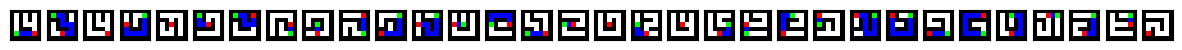

In [7]:
plot_dataset_mazes(dataset)



In [8]:
dataset_filtered: MazeDataset = dataset.filter_by.path_length(min_length=3)

print(f"{len(dataset.mazes) = }")
print(f"{len(dataset_filtered.mazes) = }")

len(dataset.mazes) = 32
len(dataset_filtered.mazes) = 19


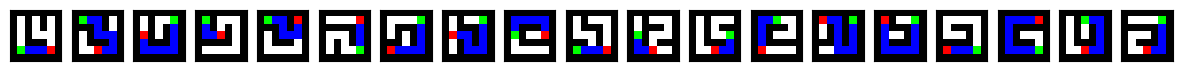

In [9]:
plot_dataset_mazes(dataset_filtered)


In [10]:
print(json.dumps(dataset_filtered.cfg.serialize()["applied_filters"], indent=2))
print(f"{MazeDataset._FILTER_NAMESPACE = }")

[
  {
    "name": "path_length",
    "kwargs": {
      "min_length": 3
    }
  }
]
MazeDataset._FILTER_NAMESPACE = <class 'maze_transformer.training.maze_dataset.MazeDatasetFilters'>


In [11]:
dataset_filtered_from_scratch: MazeDataset = MazeDataset.from_config(
	dataset_filtered.cfg,
	do_download=False,
	load_local=False,
	do_generate=True,
	save_local=False,
	local_base_path="../data/",
	verbose=True,
	zanj=zanj,
	do_parallel=False, # parallel generation has overhead, not worth it unless you're doing a lot of mazes
)

generating...


generating & solving mazes: 100%|██████████| 19/19 [00:00<00:00, 1188.35maze/s]

done generating, filtering...
applying filters to dataset of length 19...
applying filter {'name': 'path_length', 'kwargs': {'min_length': 3}}
done applying filter {'name': 'path_length', 'kwargs': {'min_length': 3}}
done applying filters, updating config...
dataset now has length 12
done filtering, updating config...


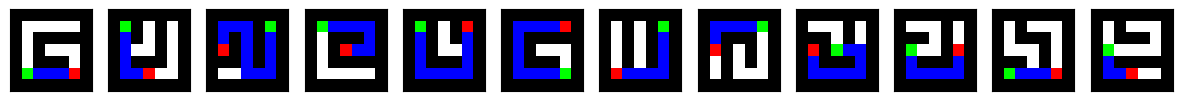

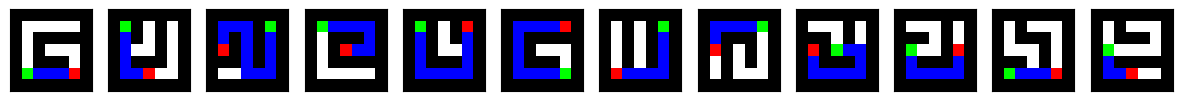

In [14]:
plot_dataset_mazes(dataset_filtered_from_scratch)
plot_dataset_mazes(dataset_filtered_from_scratch.filter_by.path_length(min_length=3))